In [ ]:
import numpy as np
import pandas as pd


In [ ]:
matches=pd.read_csv('matches.csv')
matches.head()
matches.shape

(577, 18)

In [ ]:
matches[pd.isnull(matches['winner'])]
matches['winner'].fillna('Draw', inplace=True)
#find all NaN values in winner column, so that we update this as draw

In [ ]:
matches.loc[241,'winner']

'Draw'

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,4/20/2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,4/20/2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [ ]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)


matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [ ]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [ ]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [ ]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.head(7)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,6,7,6,bat,normal,0,7,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,4/20/2008,1,3,1,bat,normal,0,3,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,4/20/2008,4,2,4,bat,normal,0,2,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,4/21/2008,9,6,9,bat,normal,0,6,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,4/22/2008,4,7,4,bat,normal,0,7,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN


In [ ]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search

1
MI


In [ ]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5


In [ ]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


In [ ]:
#31 cities
df["city"].unique()


array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur'], dtype=object)

In [ ]:
#35 venues
df["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [ ]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  3  1  0  4  2  6  5  7  6  1  3  5
  0  7  3  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  3  8  8  8  8  9 10  8 10  8 10 10  9  8 10
  9 11 10 10 11 11 12 10  9 13  9 13 12 10 10 11 11 11 12 14 14  9 13 14
 11 11 10 10 10 15  9 13 13 15 11 13 10 10 11 11 11 13 13  3  3  1  4  7
 16  0  4  2  0  2 17 16  3 17  7  3  0  1  3 16  1  0 16  3  2  3  7  2
  4  1  7  3  4  2 18  7  5  4  0  1 18  0  2  5 18  3  7  5  7 19  0  4
 19  2  4  3  3  3  3  7  6 20  2  3  4  5  0  1  3  6  5  3  7  6  3  4
 20  2  3  4  1  3  4  2  6  5  7  2  3 20  2  5  0 20  4  5  7  3  2  6
  7  3 20  6  0  4  3  0  1  5  6  1  5  7 21  0  3 19 21  3 19  7  3  3
 19  2  0  4  3  3  7  7  7  4  3  5  0 22  5 23 22  0  2  3  7  1  4  2
 23  4  0  3  5  0  1  6  7  1  7  2  3 17  5 23  1 23  2  7  4  2  3  7
 17  5  0 23  7  4  1  3  0  2 23  6  3  5 23  4  7  5  1  0  4  2  3 19
  2  6 19 23  6  5 23  0  7  7  4  0  6  2  7 23  6

In [ ]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  8  1  0  4  2  6  5  7  6  1  8  5
  0  7  8  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  8  9  9  9  9 10 11  9 11  9 11 11 10  9 11
 10 12 11 11 12 12 13 11 10 14 10 14 13 11 11 12 12 12 13 15 15 10 14 15
 12 12 11 11 11 16 10 14 14 16 12 14 11 11 12 12 12 14 14  8 17  1  4  7
 18  0  4  2  0  2 19 18 17 19  7 17  0  1 17 18  1  0 18  8  2 17  7  2
  4  1  7 17  4  2 20  7  5  4  0  1 20  0  2  5 20 17  7  5  7 21  0  4
 21  2  4  8  8  8  8  7  6 22  2  8  4  5  0  1  8  6  5  3  7  6  8  4
 22  2  3  4  1  3  4  2  6  5  7  2  8 22  2  5  0 22  4  5  7  3  2  6
  7  8 22  6  0  4  3  0  1  5  6  1  5  7 23  0  3 21 23  8 21  7  8  3
 21  2  0  4  3  3  7  7  7  4  3  5  0 24  5 25 24  0  2  3  7  1  4  2
 25  4  0  3  5  0  1  6  7  1  7  2  3 19  5 25  1 25  2  7  4  2  3  7
 19  5  0 25  7  4  1  3  0  2 25  6  3  5 25  4  7  5  1  0  4  2  3 21
  2  6 21 25  6  5 25  0  7  7  4  0  6  2  7 25  6

In [ ]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


<Axes: >

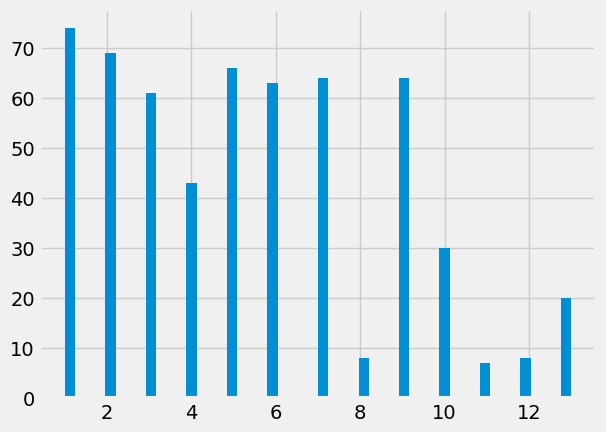

In [ ]:
df['toss_winner'].hist(bins=50)

<Axes: >

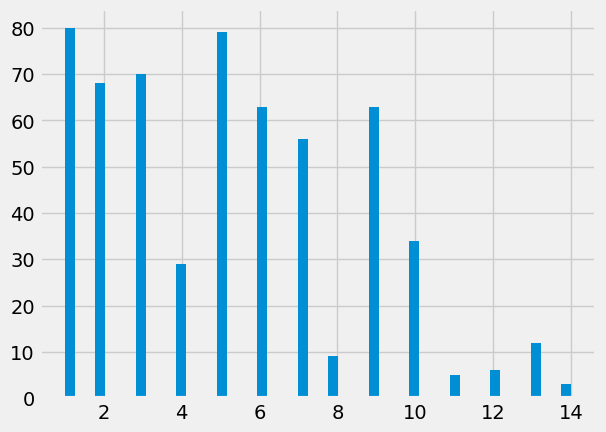

In [ ]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match winners')

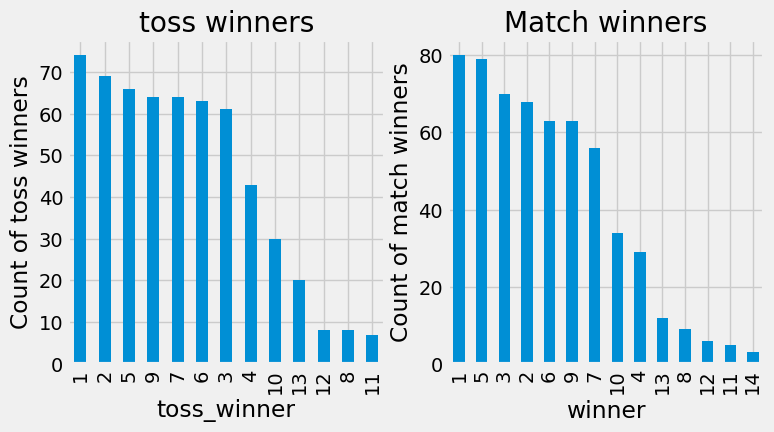

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [ ]:
 df.apply(lambda x: sum(x.isnull()),axis=0)
    #find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [ ]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [ ]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
...,...,...,...,...,...,...,...
572,7,3,26,1,3,27,3
573,8,3,2,1,3,14,3
574,10,2,9,1,2,8,10
575,8,10,9,1,10,8,10


In [ ]:
df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
5,9,6,16,0,9,26,6
6,4,7,14,0,4,23,7
7,5,1,7,1,1,15,5
8,4,6,14,1,6,23,6
9,9,1,6,1,1,22,9


In [ ]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):

    model.fit(data[predictors], data[outcome].values.ravel())
    # Make predictions on training set:
    predictions = model.predict(data[predictors])

    # Print accuracy
    accuracy = metrics.accuracy_score(data[outcome], predictions)
    print('Accuracy: %s' % '{0:.3%}'.format(accuracy))

    # Calculate additional metrics
    precision = metrics.precision_score(data[outcome], predictions, average='weighted')
    recall = metrics.recall_score(data[outcome], predictions, average='weighted')
    f1_score = metrics.f1_score(data[outcome], predictions, average='weighted')
    conf_matrix = metrics.confusion_matrix(data[outcome], predictions)
    print('Precision: %s' % '{0:.3%}'.format(precision))
    print('Recall: %s' % '{0:.3%}'.format(recall))
    print('F1 Score: %s' % '{0:.3%}'.format(f1_score))
    print('Confusion Matrix:')
    print(conf_matrix)



In [ ]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 66.551%
Precision: 66.450%
Recall: 66.551%
F1 Score: 64.535%
Confusion Matrix:
[[79  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 7 60  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  7 58  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  4  7 17  0  0  0  0  0  0  0  0  0  0]
 [10  3 11  5 50  0  0  0  0  0  0  0  0  0]
 [ 5  2  6  2 11 36  0  0  1  0  0  0  0  0]
 [ 2  2  4  3  6  8 31  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  4  4  0  0  0  0  0  0]
 [ 3  7  8  1  3  5 10  0 26  0  0  0  0  0]
 [ 0  0  2  0  0  4  0  1  8 19  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  2  2  0  0  0]
 [ 1  1  0  1  0  1  0  0  1  0  1  0  0  0]
 [ 0  1  0  0  3  0  2  0  2  2  0  0  2  0]
 [ 0  0  0  0  0  1  1  0  0  1  0  0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7


In [ ]:
from sklearn import svm
model = svm.SVC(kernel='rbf', C=1, gamma=0.5)
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 86.308%
Precision: 87.212%
Recall: 86.308%
F1 Score: 86.136%
Confusion Matrix:
[[75  0  0  0  2  2  0  0  1  0  0  0  0  0]
 [ 2 56  4  0  2  1  1  0  2  0  0  0  0  0]
 [ 3  0 63  0  1  2  0  0  1  0  0  0  0  0]
 [ 1  0  2 24  1  0  0  0  1  0  0  0  0  0]
 [ 2  1  2  0 73  1  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  1 57  1  0  2  0  0  0  0  0]
 [ 2  1  4  1  2  1 42  0  3  0  0  0  0  0]
 [ 1  0  0  0  0  0  2  5  1  0  0  0  0  0]
 [ 2  1  5  0  0  0  0  0 55  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  1 31  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  1  2  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  1  0  1  0  1  0  0  0  9  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  0  1]]


In [ ]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=9)
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 83.362%
Precision: 83.669%
Recall: 83.362%
F1 Score: 83.066%
Confusion Matrix:
[[77  1  0  0  0  1  0  0  1  0  0  0  0  0]
 [ 2 61  4  0  0  1  0  0  0  0  0  0  0  0]
 [ 5  2 54  7  1  0  0  0  1  0  0  0  0  0]
 [ 1  1  0 25  2  0  0  0  0  0  0  0  0  0]
 [ 5  2  3  2 67  0  0  0  0  0  0  0  0  0]
 [ 2  0  3  0  2 55  0  0  1  0  0  0  0  0]
 [ 2  3  4  1  3  5 36  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  8  0  0  0  0  0  0]
 [ 2  2  4  0  2  0  3  0 50  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0  3 28  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  5  0  0]
 [ 0  0  0  0  1  0  0  0  1  0  0  0 10  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=46)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

Accuracy: 89.601%
Precision: 90.030%
Recall: 89.601%
F1 Score: 89.593%
Confusion Matrix:
[[74  0  0  1  1  2  0  0  2  0  0  0  0  0]
 [ 2 59  3  0  1  1  1  0  1  0  0  0  0  0]
 [ 3  0 63  0  1  0  0  0  3  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0  0  0  0  0]
 [ 3  1  2  0 69  1  2  0  0  0  0  0  1  0]
 [ 1  0  2  0  1 56  2  0  1  0  0  0  0  0]
 [ 2  1  4  1  0  0 46  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 1  1  2  0  0  0  0  0 58  0  0  0  1  0]
 [ 0  0  2  0  0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 11  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  0  1]]


In [ ]:
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2


In [ ]:
test=pd.read_csv("test.csv")
test.head()

,team1,team2,city,toss_winner,venue,toss_decision,date,winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR
2,KKR,MI,3,MI,3,0,5-May,MI
3,CSK,MI,7,CSK,7,1,7-May,MI
4,DC,CSK,22,CSK,24,1,10-May,CSK


In [ ]:
test = test.drop(["date","winner"], axis=1,inplace=False)

In [ ]:
test.replace(encode, inplace=True)
test.head(2)

,team1,team2,city,toss_winner,venue,toss_decision
0,9,1,3,1,3,0
1,10,6,5,6,5,0


In [ ]:
#feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners
#followed by toss winning, city
print()
print("Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city")
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print()
print(imp_input)


Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city

team2            0.261675
team1            0.213989
venue            0.173109
toss_winner      0.159943
city             0.157577
toss_decision    0.033707
dtype: float64


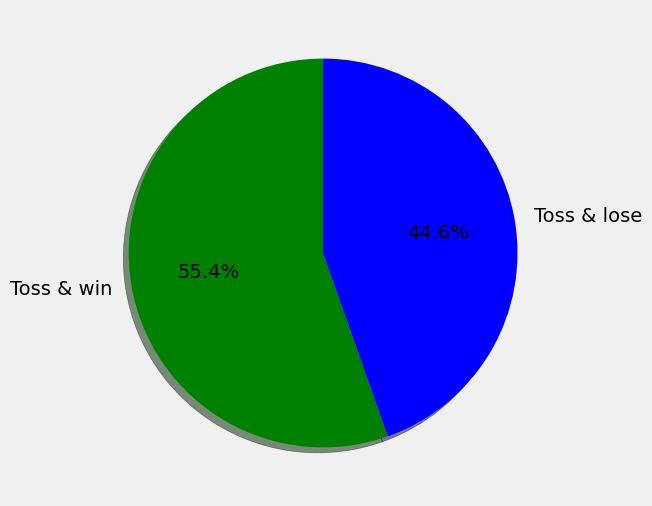

In [ ]:
#probability of match winning by winning toss for MI
#df['toss_winner'].value_counts()
count =0
for i in range(577):
    if df["toss_winner"][i]==df["winner"][i]==1 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

# Toss winning does not gaurantee a match win from analysis of current stats and thus
#prediction feature gives less weightage to that

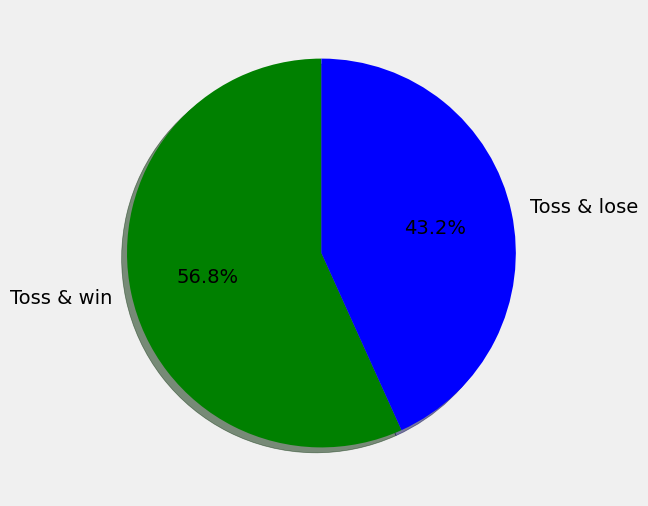

In [ ]:
#probability of match winning by winning toss for Chennai Super Kings CSK
#df['toss_winner'].value_counts()
count =0
for i in range(577):
    if df["toss_winner"][i]==df["winner"][i]==5 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus
#prediction feature gives less weightage to that

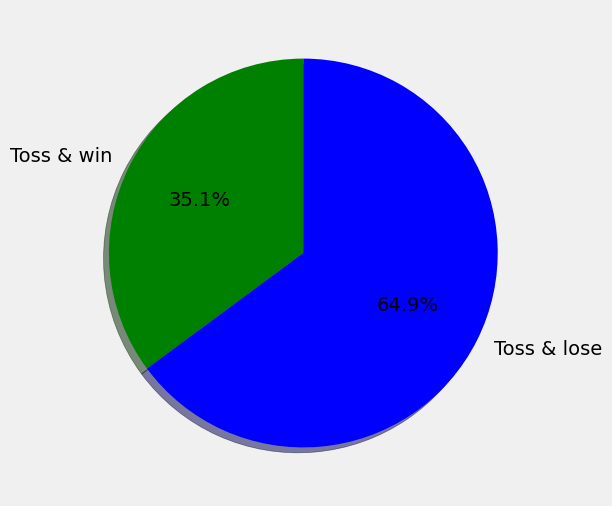

In [ ]:
#probability of match winning by winning toss for KXIP
#df['toss_winner'].value_counts()
count =0
for i in range(577):
    if df["toss_winner"][i]==df["winner"][i]==9 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 577 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(577-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus
#prediction feature gives less weightage to that

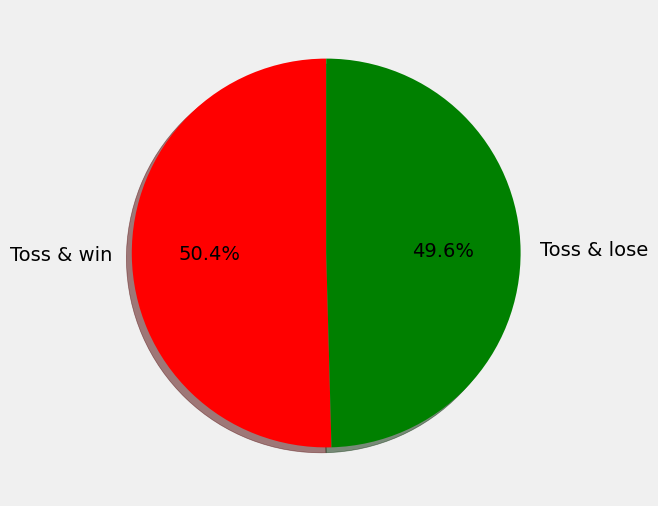

In [ ]:
#genralised probbaility for winning match by winning toss


import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]

slices=[len(df_fil),(577-len(df_fil))]

mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

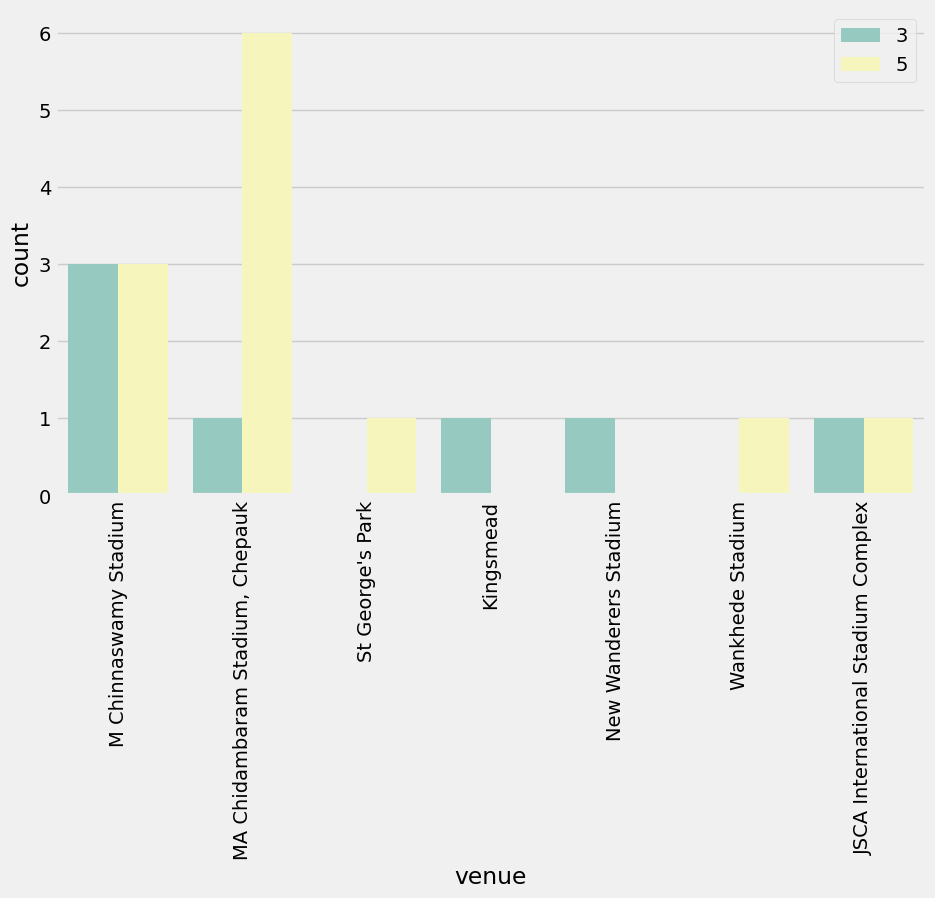

'MA Chidambaram Stadium, Chepauk'

In [ ]:
#top 2 team analysis based on number of matches won against each other and how venue affects them?
#Previously we noticed that CSK won 79, RCB won 70 matches
#now let us compare venue against a match between CSK and RCB
#we find that CSK has won most matches against RCB in MA Chidambaram Stadium, Chepauk, Chennai
#RCB has not won any match with CSK in stadiums St George's Park and Wankhede Stadium, but won matches
#with CSK in Kingsmead, New Wanderers Stadium.
#It does prove that chances of CSK winning is more in Chepauk stadium when played against RCB.
# Proves venue is important feature in predictability
import seaborn as sns
team1=dicVal['CSK']
team2=dicVal['RCB']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set3')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()
le.classes_[15]